Iteration 1: Best Cost = 1
Iteration 2: Best Cost = 3
Iteration 3: Best Cost = 3
Iteration 4: Best Cost = 3
Iteration 5: Best Cost = 1
Zero conflict schedule found on attempt 6!

Best Schedule Details:
Attempt Number: 6
Optimal Cost: 0


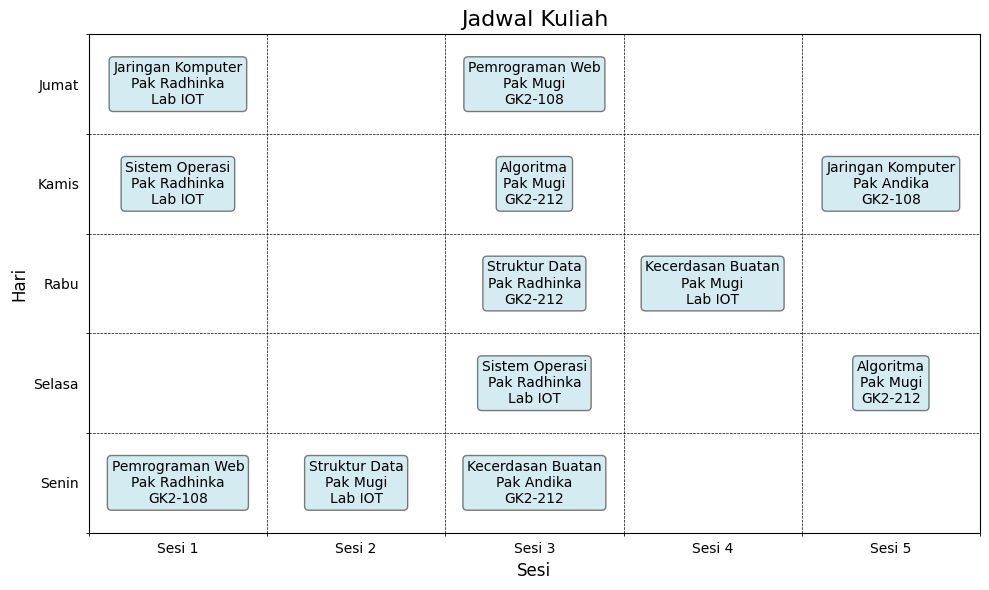

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Problem parameters
courses = ["Algoritma", "Sistem Operasi", "Struktur Data", "Jaringan Komputer", "Kecerdasan Buatan", "Pemrograman Web"]
professors = ["Pak Andika", "Pak Radhinka", "Pak Mugi"]
rooms = ["Lab IOT", "GK2-212", "GK2-108"]
days = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat"]
sessions_per_day = 5
course_sessions = {course: 2 for course in courses}

def generate_initial_schedule():
    schedule = [[None for _ in range(sessions_per_day)] for _ in range(len(days))]
    for course, sessions in course_sessions.items():    
        for _ in range(sessions):
            while True:
                day = random.randint(0, len(days) - 1)
                session = random.randint(0, sessions_per_day - 1)
                if schedule[day][session] is None:
                    professor = random.choice(professors)
                    room = random.choice(rooms)
                    schedule[day][session] = (course, professor, room)
                    break
    return schedule

def calculate_cost(schedule):
    cost = 0
    for day in schedule:
        room_usage = {}
        professor_usage = {}
        course_day_usage = {}
        for session in day:
            if session:
                course, professor, room = session
                if room in room_usage:
                    cost += 1
                room_usage[room] = True
                
                if professor in professor_usage:
                    cost += 1
                professor_usage[professor] = True
                
                if course in course_day_usage:
                    cost += 1
                course_day_usage[course] = True
    return cost

def generate_neighbors(schedule):
    neighbors = []
    for _ in range(20):
        new_schedule = [day[:] for day in schedule]
        day1, day2 = random.sample(range(len(days)), 2)
        session1, session2 = random.randint(0, sessions_per_day - 1), random.randint(0, sessions_per_day - 1)
        
        if new_schedule[day1][session1] is not None and new_schedule[day2][session2] is not None:
            new_schedule[day1][session1], new_schedule[day2][session2] = (
                new_schedule[day2][session2],
                new_schedule[day1][session1],
            )
            neighbors.append(new_schedule)
    return neighbors

def find_zero_conflict_schedule(max_total_attempts=1000):
    # Track all iterations
    iteration_costs = []
    all_iteration_results = []
    
    for total_attempt in range(max_total_attempts):
        # Generate initial schedule
        current_schedule = generate_initial_schedule()
        current_cost = calculate_cost(current_schedule)
        
        # If we found 0 cost immediately, return
        if current_cost == 0:
            print(f"Zero conflict schedule found on first attempt!")
            iteration_costs.append(0)
            return current_schedule, 0, 1, iteration_costs
        
        # Store initial cost for this iteration
        iteration_best_cost = current_cost
        iteration_best_schedule = current_schedule
        
        # Local hill climbing
        no_improvement_count = 0
        while no_improvement_count < 100:  # Limit attempts to improve
            neighbors = generate_neighbors(current_schedule)
            
            # Find best neighbor
            best_neighbor = None
            best_neighbor_cost = current_cost
            for neighbor in neighbors:
                neighbor_cost = calculate_cost(neighbor)
                if neighbor_cost < best_neighbor_cost:
                    best_neighbor = neighbor
                    best_neighbor_cost = neighbor_cost
            
            # If found a better neighbor
            if best_neighbor is not None and best_neighbor_cost < current_cost:
                current_schedule = best_neighbor
                current_cost = best_neighbor_cost
                
                # Update best for this iteration if needed
                if current_cost < iteration_best_cost:
                    iteration_best_cost = current_cost
                    iteration_best_schedule = current_schedule
                
                # Reset no improvement counter
                no_improvement_count = 0
                
                # Check if we found zero conflict
                if current_cost == 0:
                    print(f"Zero conflict schedule found on attempt {total_attempt + 1}!")
                    iteration_costs.append(0)
                    return current_schedule, 0, total_attempt + 1, iteration_costs
            else:
                no_improvement_count += 1
        
        # Store results of this iteration
        all_iteration_results.append({
            'attempt_number': total_attempt + 1,
            'best_cost': iteration_best_cost,
            'schedule': iteration_best_schedule
        })
        
        # Track costs for visualization
        iteration_costs.append(iteration_best_cost)
        
        # Print current iteration details
        print(f"Iteration {total_attempt + 1}: Best Cost = {iteration_best_cost}")
    
    # If no zero conflict found, find the closest
    all_iteration_results.sort(key=lambda x: x['best_cost'])
    closest_to_zero = all_iteration_results[0]
    
    print("\nNo zero conflict schedule found after all attempts.")
    print("Iterations with lowest conflicts:")
    for result in all_iteration_results[:5]:
        print(f"Attempt {result['attempt_number']}: Cost = {result['best_cost']}")
    
    # Visualize iteration costs
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(iteration_costs) + 1), iteration_costs, marker='o')
    plt.title("Cost Across Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.yscale('log')  # Use log scale to better visualize variations
    plt.tight_layout()
    plt.show()
    
    return (
        closest_to_zero['schedule'], 
        closest_to_zero['best_cost'], 
        closest_to_zero['attempt_number'],
        iteration_costs
    )

# Run the algorithm
optimal_schedule, optimal_cost, attempt_number, iteration_costs = find_zero_conflict_schedule()

print(f"\nBest Schedule Details:")
print(f"Attempt Number: {attempt_number}")
print(f"Optimal Cost: {optimal_cost}")

# Visualization function
def visualize_schedule(schedule):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Jadwal Kuliah", fontsize=16)
    ax.set_xlabel("Sesi", fontsize=12)
    ax.set_ylabel("Hari", fontsize=12)
    ax.set_xticks(range(sessions_per_day))
    ax.set_yticks(range(len(days)))
    ax.set_xticklabels([f"Sesi {i+1}" for i in range(sessions_per_day)])
    ax.set_yticklabels(days)
    ax.set_xlim(-0.5, sessions_per_day - 0.5)
    ax.set_ylim(-0.5, len(days) - 0.5)

    for day_idx, day in enumerate(schedule):
        for session_idx, session in enumerate(day):
            if session:
                course, professor, room = session
                text = f"{course}\n{professor}\n{room}"
                ax.text(session_idx, day_idx, text, ha="center", va="center", fontsize=10, bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.5))

    # Grid lines for better clarity
    ax.set_xticks(np.arange(-0.5, sessions_per_day, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(days), 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="--", linewidth=0.5)
    ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=True)
    plt.tight_layout()
    plt.show()

# Visualize the best schedule
visualize_schedule(optimal_schedule)